In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.3 MB/s eta 0:00:00


# PubMed article by years

In [20]:
search_DATA = ["metabolomics"]

In [21]:
from Bio import Entrez
import pandas as pd

def search_articles(search, year):
    Entrez.email = "YourEmail@example.com"  # Always provide your email
    query = f"{search}[Title/Abstract] AND ({year}[Date - Publication] : {year}[Date - Publication])  AND (multi-omics[Title/Abstract])"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

years = range(2013, 2024)
data = []

for search in search_DATA:
    yearly_counts = [search_articles(cell_line, year) for year in years]
    data.append(yearly_counts)

df = pd.DataFrame(data, index=search_DATA, columns=years)
print(df)

              2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
metabolomics     9    13    14    36    49    64    96   177   277   379   494


In [27]:
search_DATA = ["multi-omics"]

In [28]:
from Bio import Entrez
import pandas as pd

def search_articles(search, year):
    Entrez.email = "YourEmail@example.com"  # Always provide your email
    query = f"({year}[Date - Publication] : {year}[Date - Publication])  AND (multi-omics[Title/Abstract])"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

years = range(2013, 2024)
data = []

for search in search_DATA:
    yearly_counts = [search_articles(search, year) for year in years]
    data.append(yearly_counts)

df_mult = pd.DataFrame(data, index=search_DATA, columns=years)
print(df_mult)

             2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
multi-omics    42    56    95   193   226   354   531   927  1623  2260  2667


In [29]:
#metabolome
df_long=df.T
#multiome
df_long_m=df_mult.T

In [31]:
df_long.reset_index(inplace=True)
df_long = df_long.rename(columns = {'index':'Year'})

df_long_m.reset_index(inplace=True)
df_long_m = df_long_m.rename(columns = {'index':'Year'})

In [33]:
df_long['Year'] = df_long['Year'].astype(str)

print("\nTypes of data after conversion:\n", df_long.dtypes)


Types of data after conversion:
 Year            object
metabolomics     int64
dtype: object


In [34]:
df_long_m['Year'] = df_long_m['Year'].astype(str)

print("\nTypes of data after conversion:\n", df_long_m.dtypes)


Types of data after conversion:
 Year           object
multi-omics     int64
dtype: object


In [36]:
c= ['darkblue', 'lightblue', 'peru', 'olivedrab', 'palegoldenrod', '#d3a9b7', 'purple', 'lightslategray', 'brown',
    'lightblue', 'black', 'teal', 'tomato', 'gainsboro', 'firebrick', 'peachpuff', 'darkorange', 'darkgrey', 'darkkhaki', 'gold', 'mediumslateblue',
    'violet', 'darkorchid', 'turquoise', 'lime', 'slategrey', 'rosybrown']

In [37]:
result=df_long.merge(df_long_m, how='inner', on='Year')
result

,Year,metabolomics,multi-omics
0,2013,9,42
1,2014,13,56
2,2015,14,95
3,2016,36,193
4,2017,49,226
5,2018,64,354
6,2019,96,531
7,2020,177,927
8,2021,277,1623
9,2022,379,2260


In [38]:
print("\nTypes of data after conversion:\n", result.dtypes)


Types of data after conversion:
 Year            object
metabolomics     int64
multi-omics      int64
dtype: object


In [41]:
result["metabolome_per"]=result["metabolomics"]/result["multi-omics"]*100
result["metabolome_per"]

0     21.428571
1     23.214286
2     14.736842
3     18.652850
4     21.681416
5     18.079096
6     18.079096
7     19.093851
8     17.067160
9     16.769912
10    18.522685
Name: metabolome_per, dtype: float64

In [42]:
result["mult_per"]=100-result["metabolome_per"]
result["mult_per"]

0     78.571429
1     76.785714
2     85.263158
3     81.347150
4     78.318584
5     81.920904
6     81.920904
7     80.906149
8     82.932840
9     83.230088
10    81.477315
Name: mult_per, dtype: float64

In [43]:
result

,Year,metabolomics,multi-omics,metabolome_per,mult_per
0,2013,9,42,21.428571,78.571429
1,2014,13,56,23.214286,76.785714
2,2015,14,95,14.736842,85.263158
3,2016,36,193,18.652850,81.347150
4,2017,49,226,21.681416,78.318584
5,2018,64,354,18.079096,81.920904
6,2019,96,531,18.079096,81.920904
7,2020,177,927,19.093851,80.906149
8,2021,277,1623,17.067160,82.932840
9,2022,379,2260,16.769912,83.230088


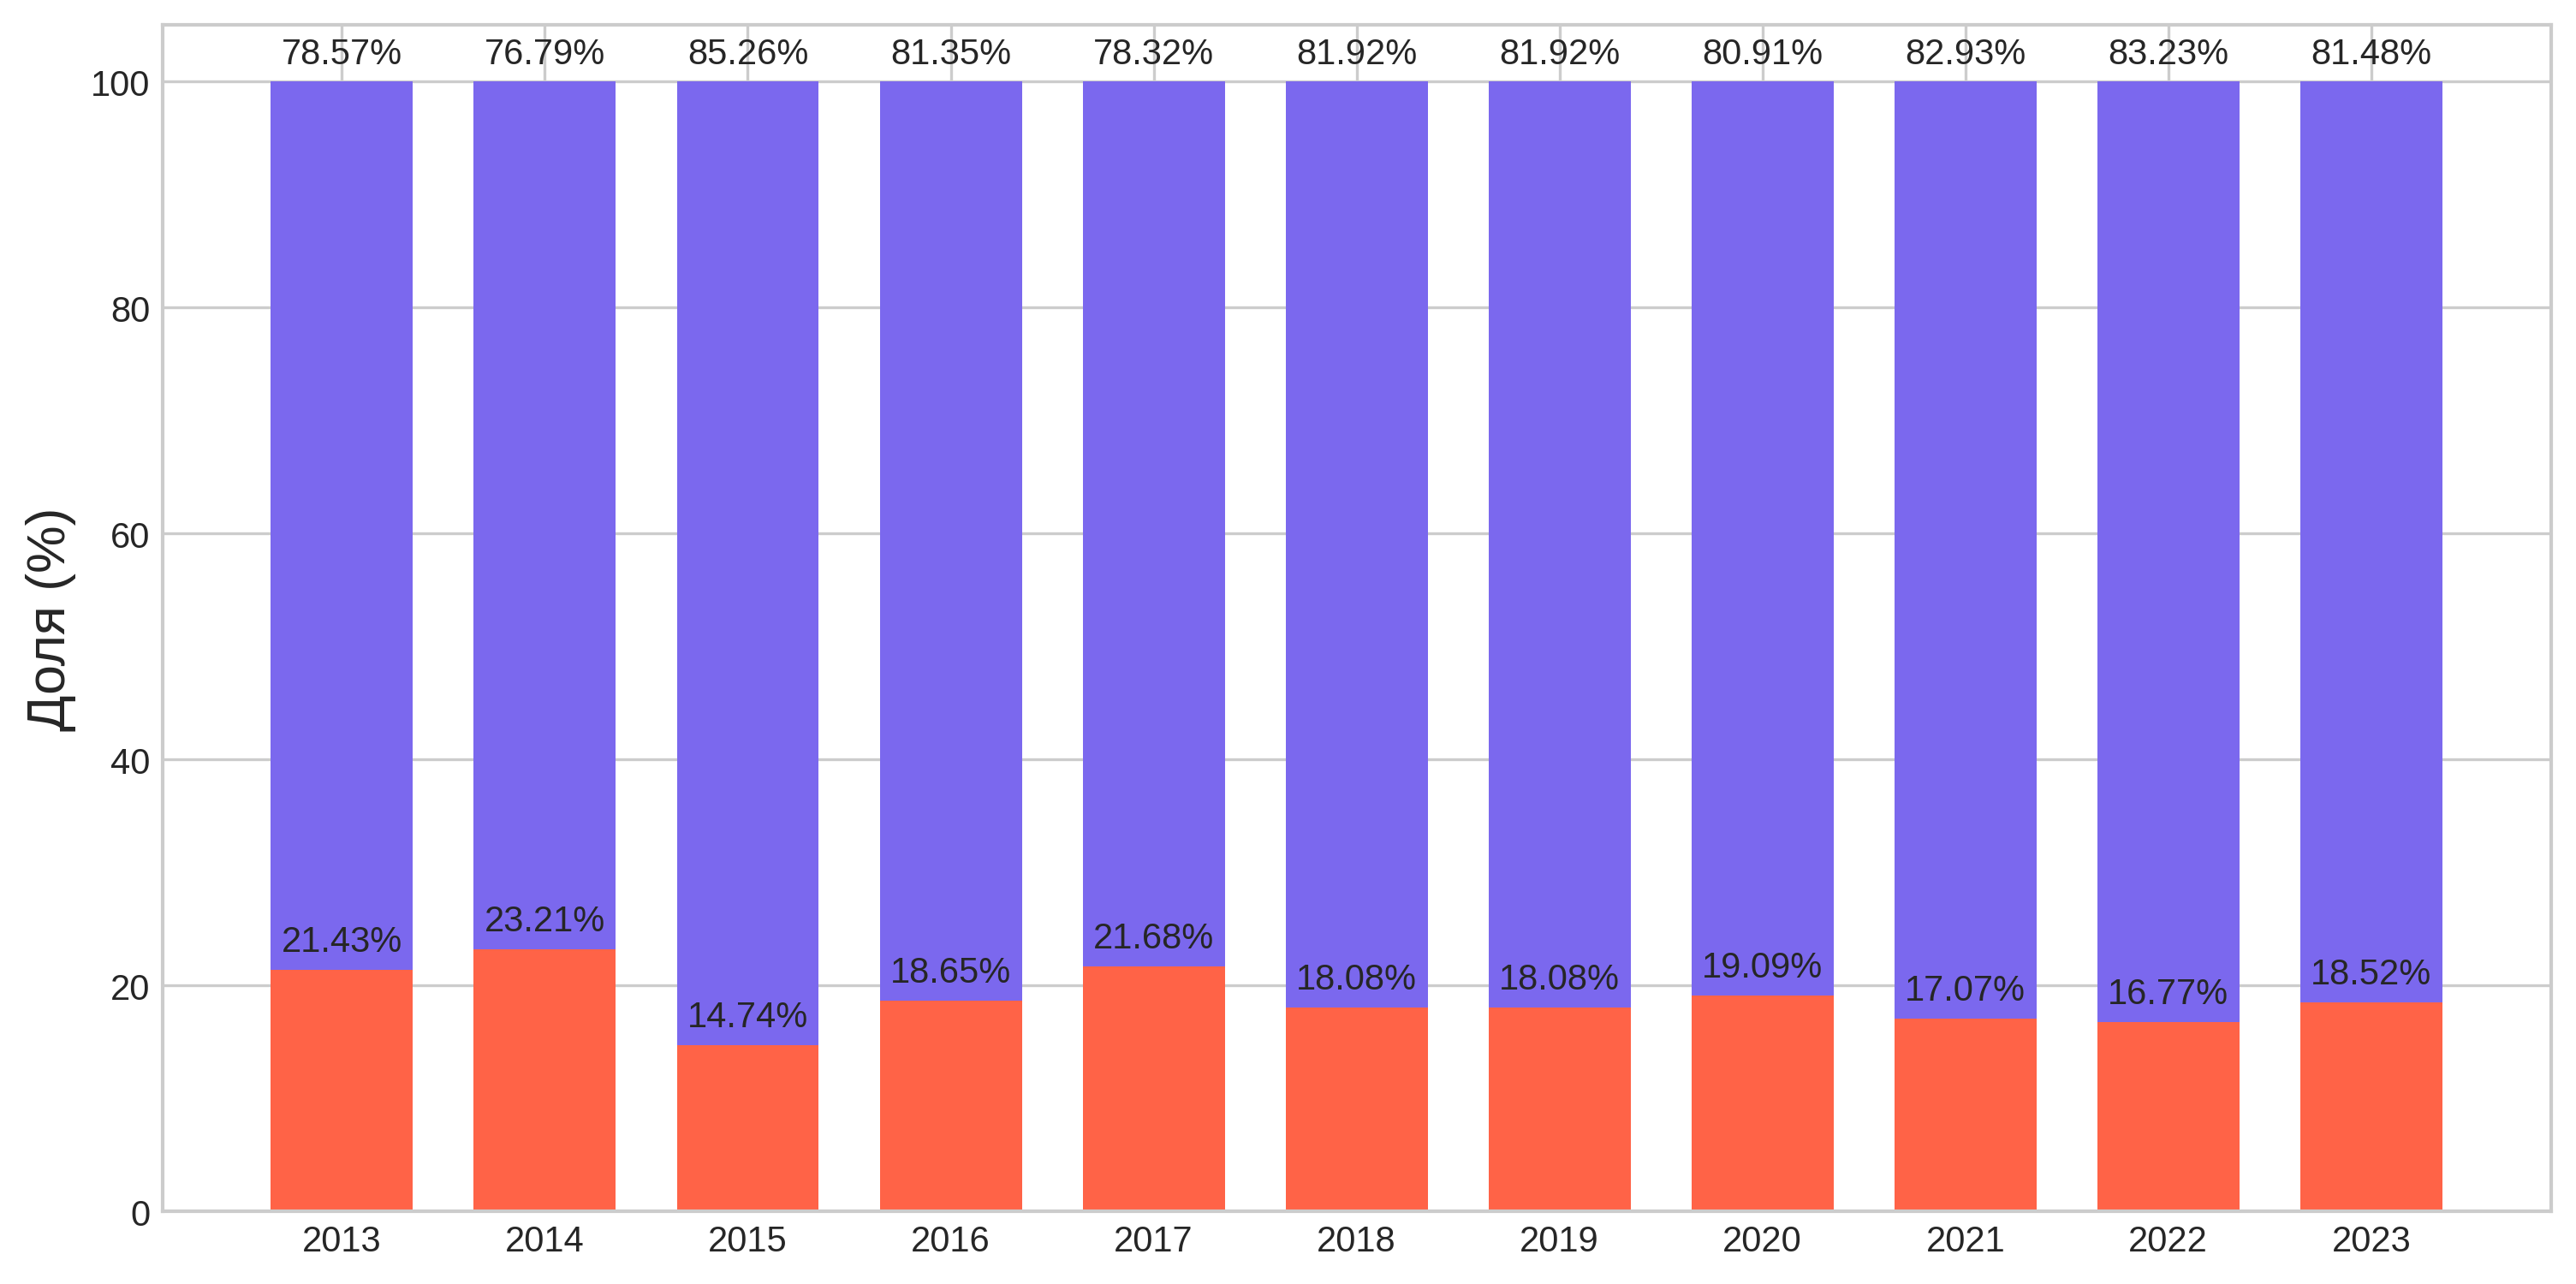

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6), dpi= 300)

bar_positions = range(len(result))
bar_width = 0.7

bars1 = ax.bar(bar_positions, result['metabolome_per'], width=bar_width, color='tomato', label='metabolome_per')
bars2 = ax.bar(bar_positions, result['mult_per'], width=bar_width, bottom=result['metabolome_per'], color='mediumslateblue', label='mult_per')

ax.set_xticks(bar_positions)
ax.set_xticklabels(result['Year'])

ax.set_ylabel('Доля (%)', fontsize=15)
#ax.set_xlabel('Year')
#ax.set_title('Percentage of Metabolome and Multi-omics over the Years')

for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}%', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{height2:.2f}%', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

#ax.legend()
plt.show()

<ipython-input-53-df595358fe4c>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


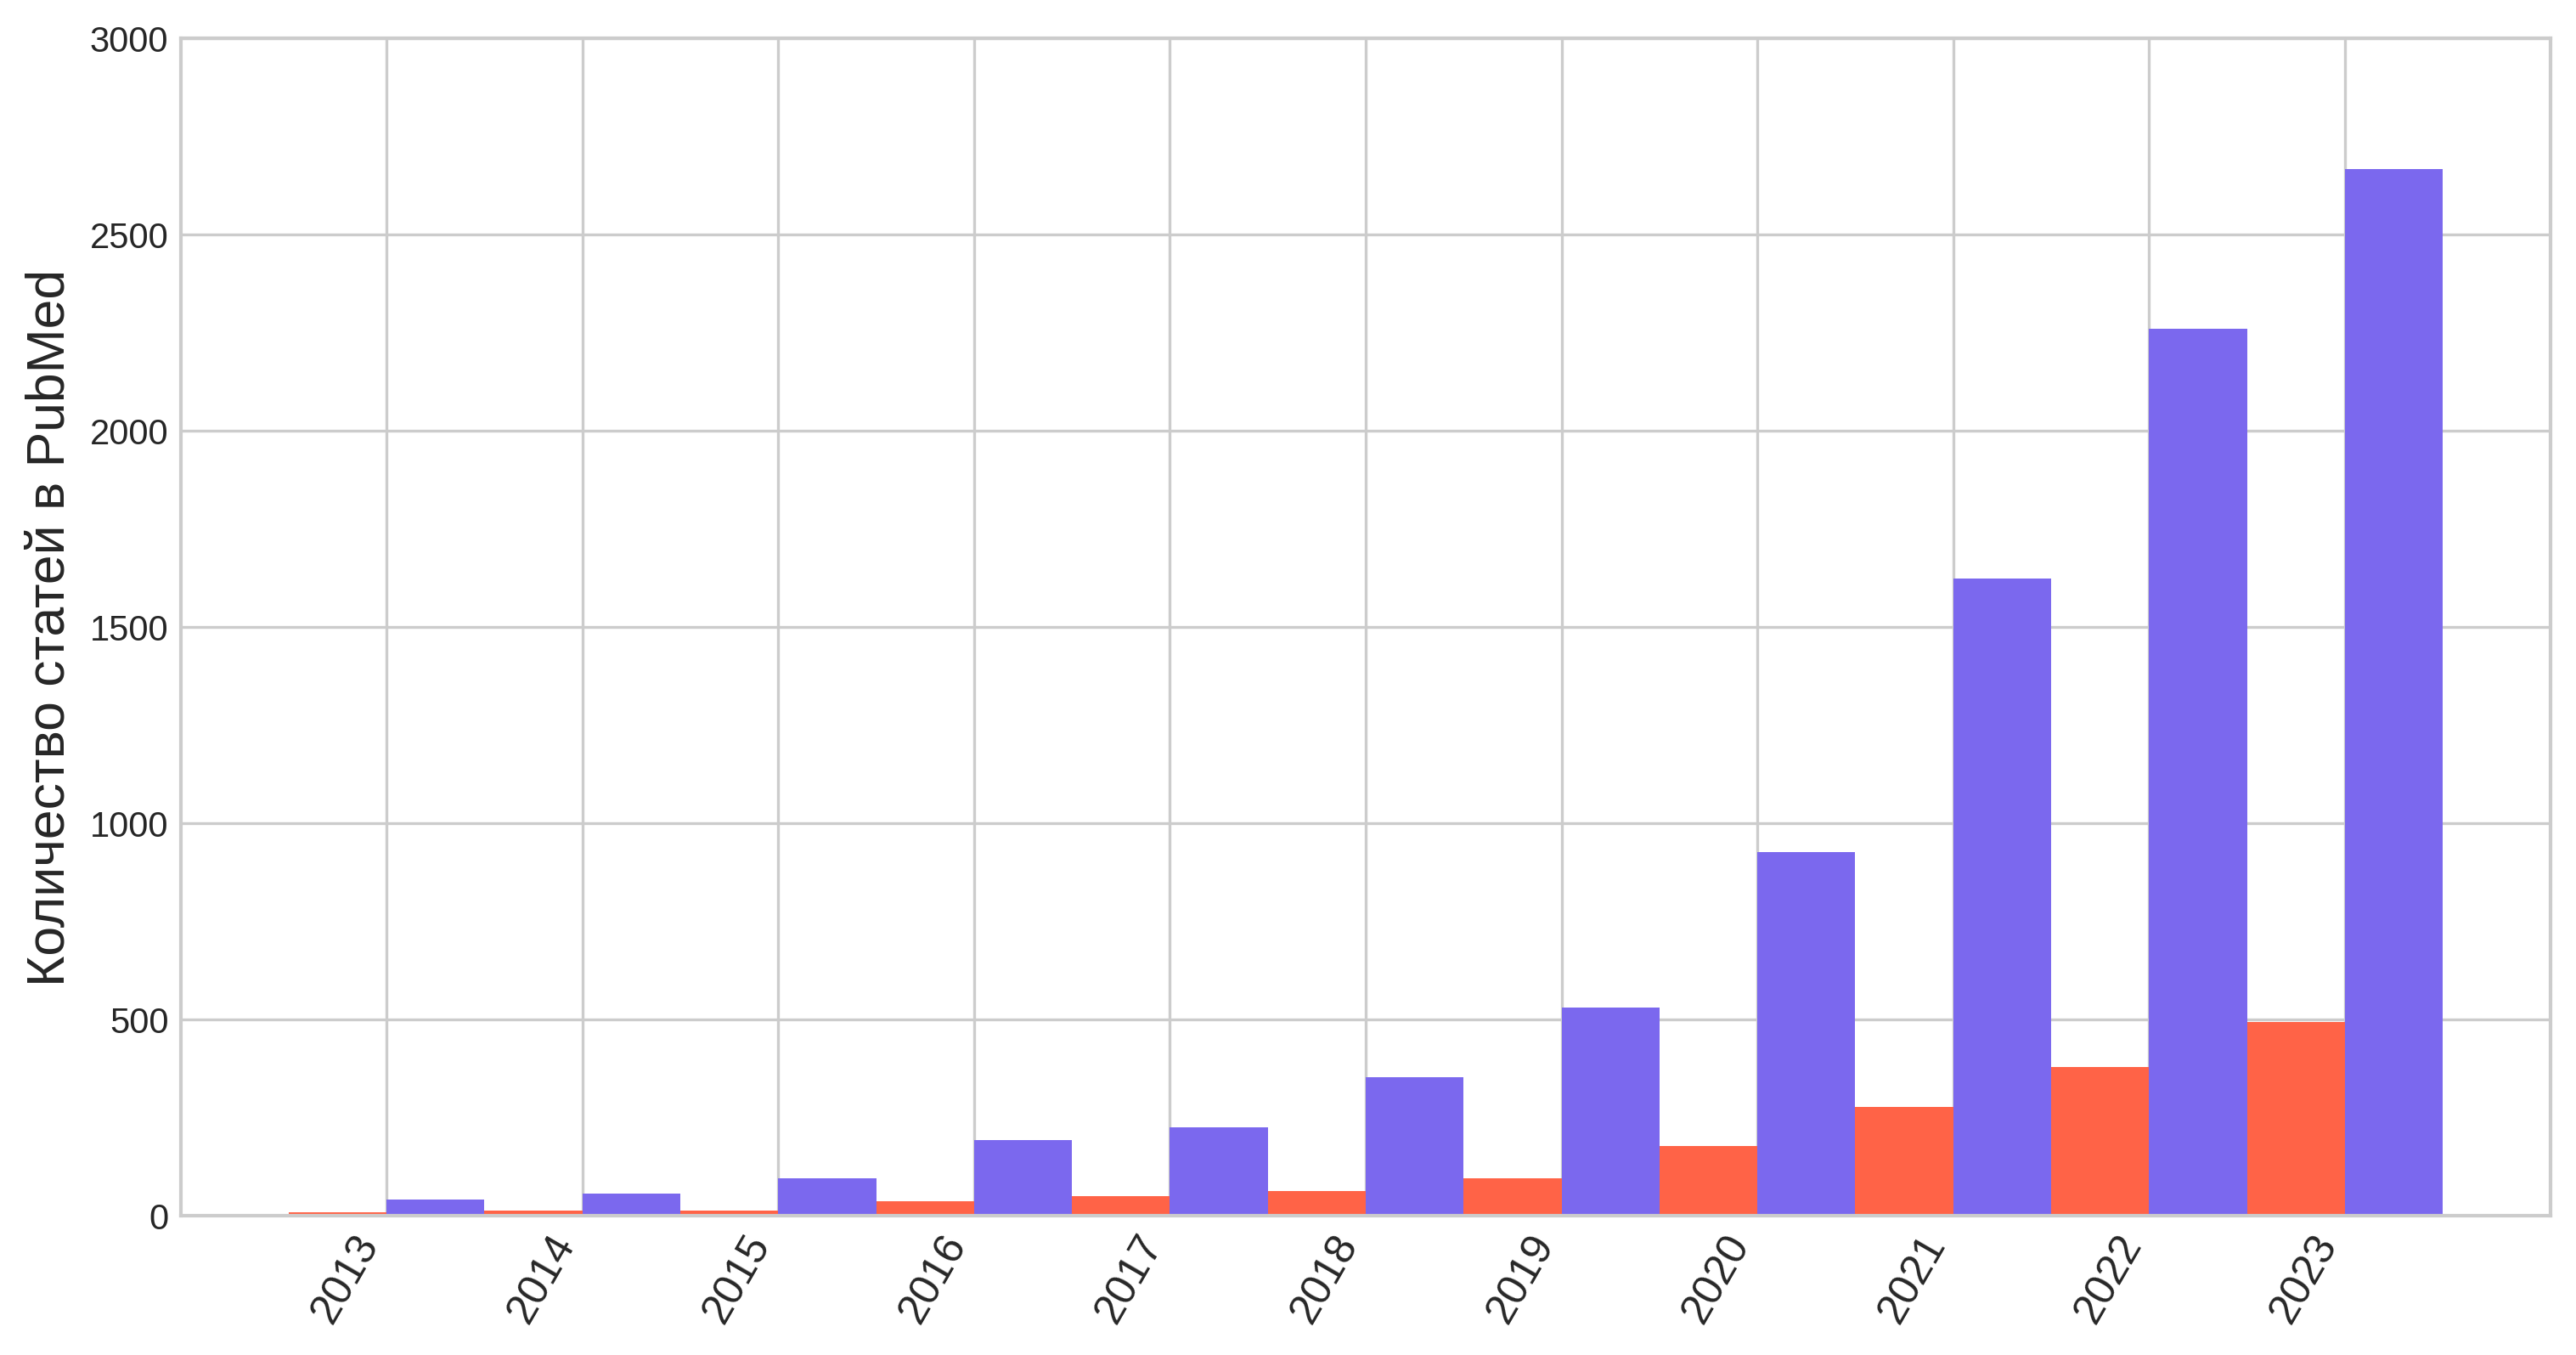

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

barWidth=0.5

# Create a grouped bar plot
plt.figure(figsize=(12,6), dpi= 300)

# Set position of bar on X axis
r1 = np.arange(len(result['Year']))
r2 = [x + barWidth for x in r1]

# Plot bars
plt.bar(r1, result['metabolomics'], color='tomato', width=barWidth, label='Metabolome')
plt.bar(r2, result['multi-omics'], color='mediumslateblue', width=barWidth, label='Multi-Omics')

#plt.gca().set_xticklabels([r + barWidth/2 for r in range(len(result['Year']))], result['Year'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
plt.xticks([r + barWidth/2 for r in range(len(result['Year']))], result['Year'], rotation=60,  size=12, ha='right', fontsize=12)
plt.ylabel('Количество статей в PubMed', fontsize=15)
plt.ylim(0, 3000)
plt.style.use('seaborn-whitegrid')
plt.show()

<ipython-input-51-9c1695268116>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_long['Year'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
<ipython-input-51-9c1695268116>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


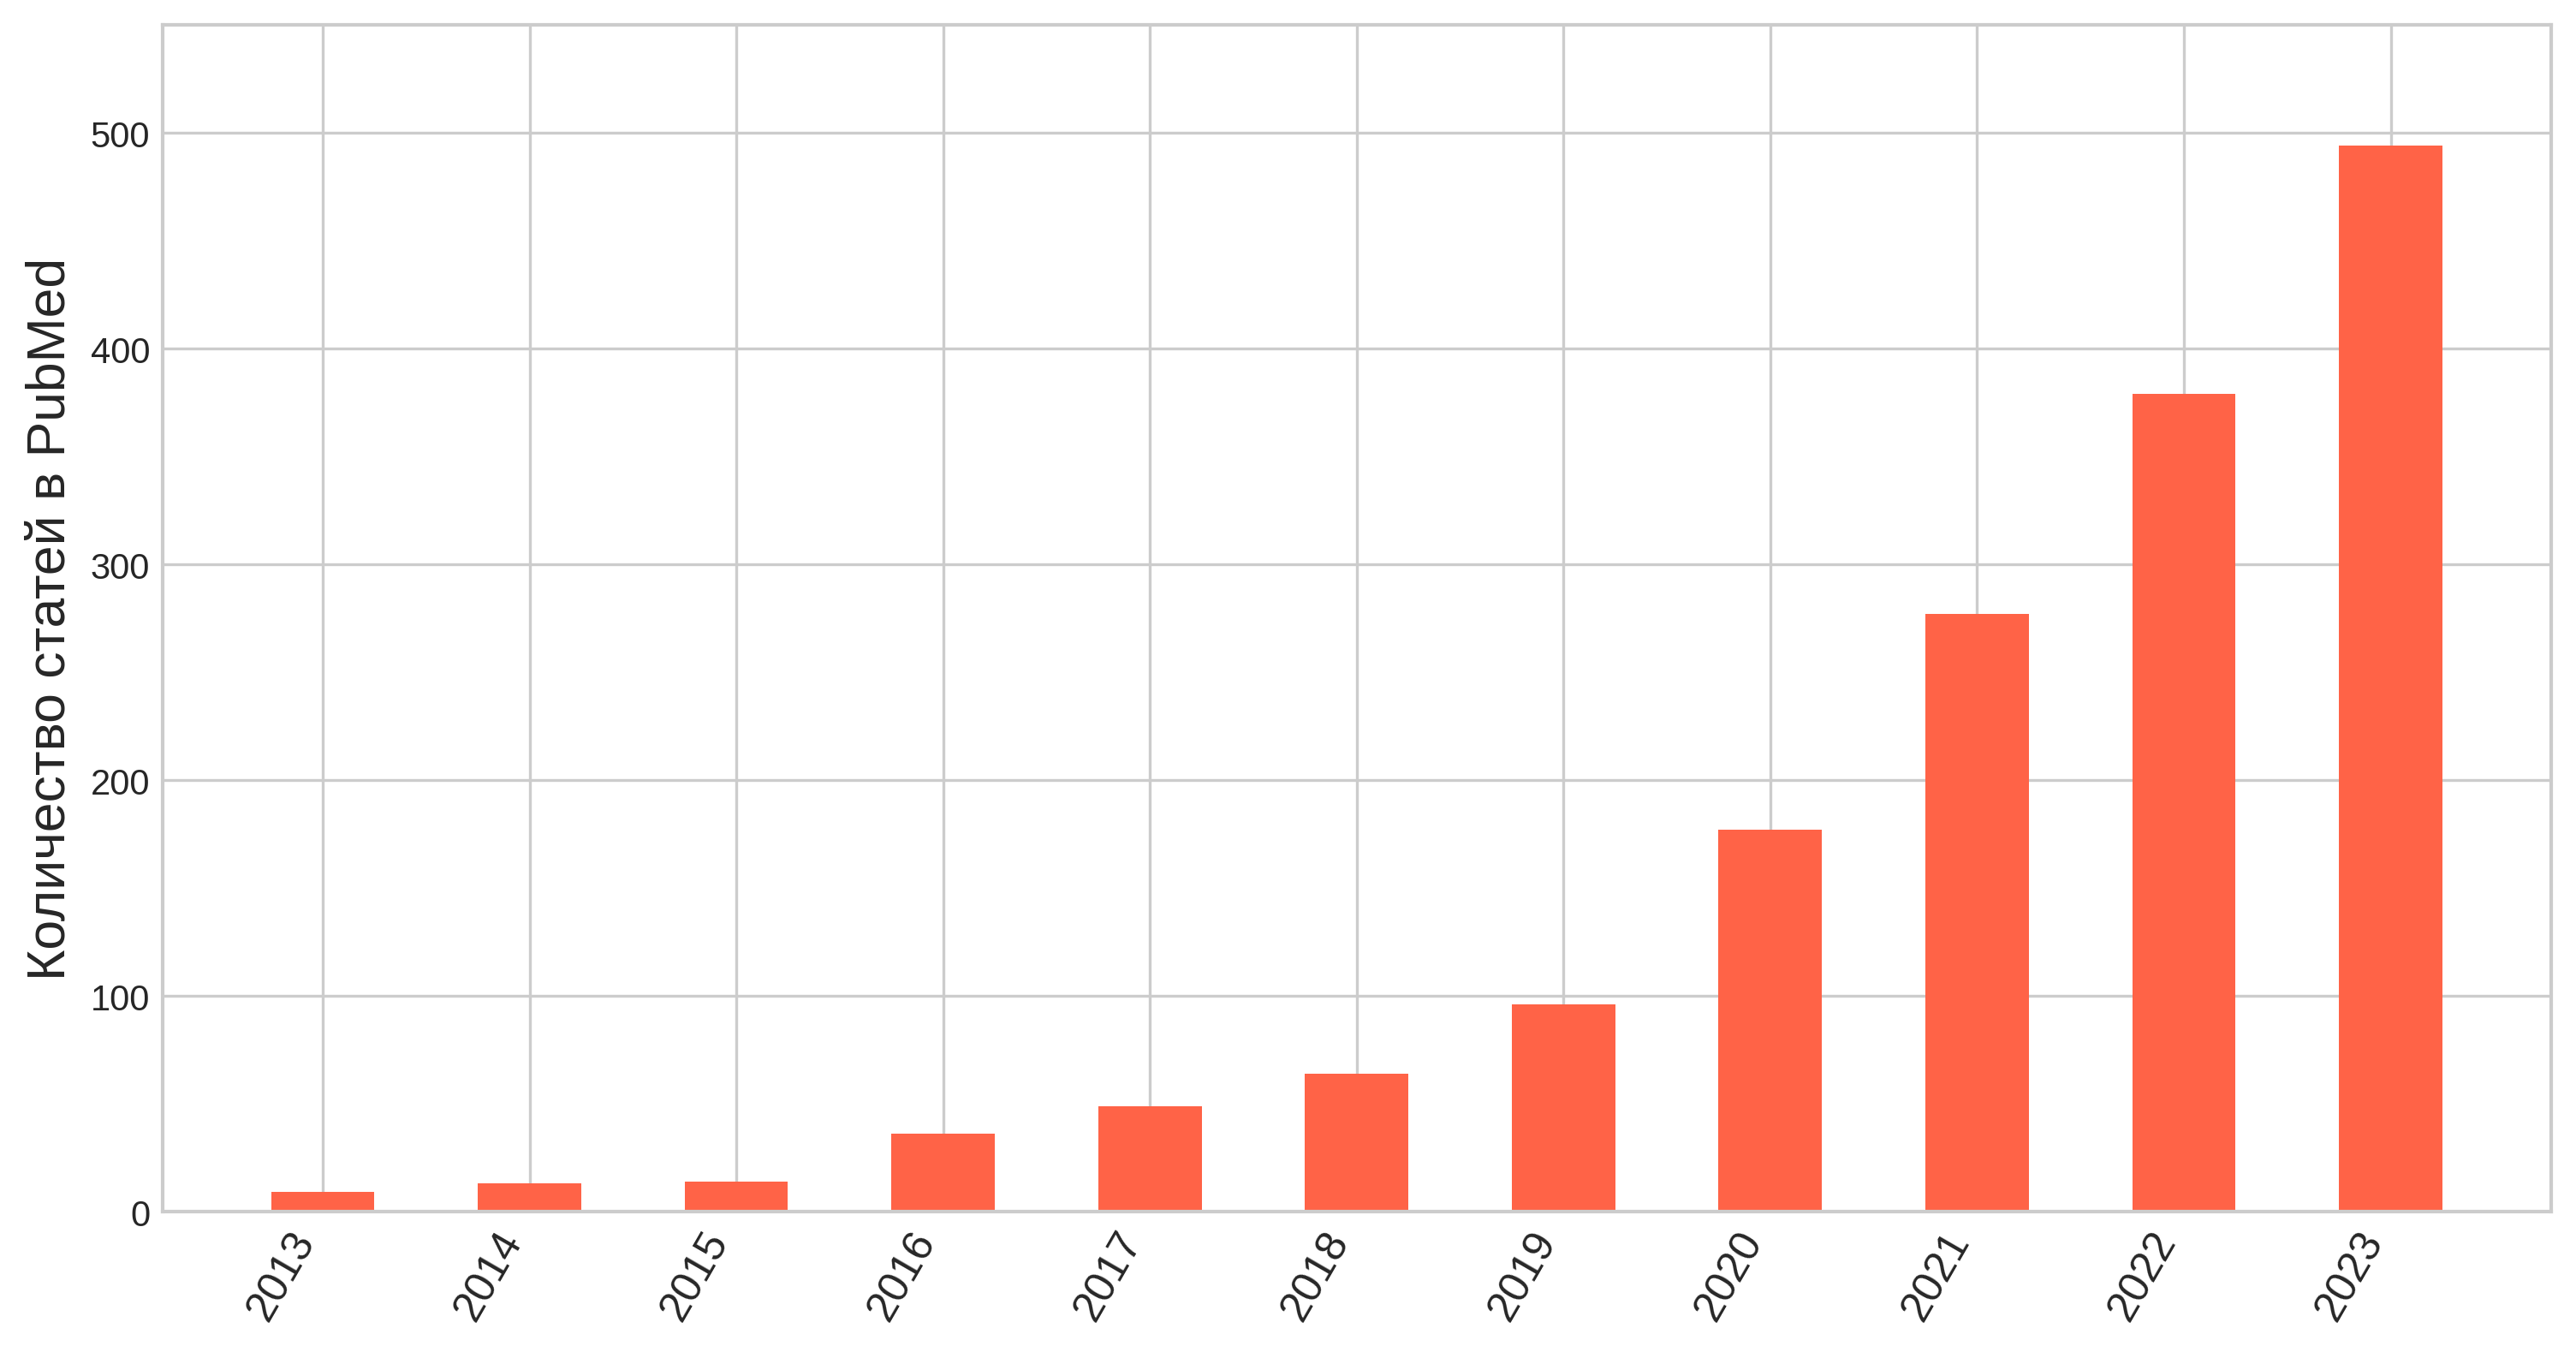

In [51]:
#https://habr.com/ru/articles/468295/

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Plot Bars
plt.figure(figsize=(12,6), dpi= 300)
plt.bar(df_long['Year'], df_long['metabolomics'], color="tomato", width=.5)

# Decoration
plt.gca().set_xticklabels(df_long['Year'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')

plt.ylabel('Количество статей в PubMed', fontsize=15)
plt.ylim(0, 550)
plt.style.use('seaborn-whitegrid')
plt.show()
#plt.savefig('/content/drive/MyDrive/hist_PubMed.png')